In [61]:
#Loading Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [62]:
# This will ask for authorization
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
#Loading Files in Google Colab
file_path1 = "/content/drive/My Drive/Medibuddy Insurance Data Price (1) (2).xlsx"
file_path2 = "/content/drive/My Drive/Medibuddy insurance data personal details (1) (2).xlsx"

df1 = pd.read_excel(file_path1)
df2 = pd.read_excel(file_path2)

df1.head(), df2.head()


(  Policy no.  age     sex     bmi  charges in INR
 0  PLC156898   19  female  27.900     16884.92400
 1  PLC156907   18    male  33.770      1725.55230
 2  PLC156916   28    male  33.000      4449.46200
 3  PLC156925   33    male  22.705     21984.47061
 4  PLC156934   32    male  28.880      3866.85520,
   Policy no.  children smoker     region
 0  PLC157006         0     no  southwest
 1  PLC157033         1     no  southwest
 2  PLC157060         0     no  southwest
 3  PLC157087         1     no  southwest
 4  PLC157186         5     no  southwest)

In [64]:
# Merge both datasets on Policy no.
df = pd.merge(df1, df2[['Policy no.', 'region']], on="Policy no.", how="left")

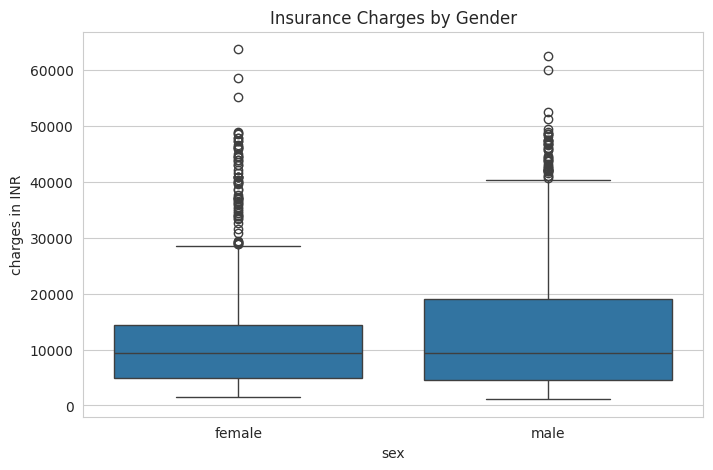

In [65]:
#1. Does gender matter for extending policies?
plt.figure(figsize=(8, 5))
sns.boxplot(x='sex', y='charges in INR', data=df1)
plt.title("Insurance Charges by Gender")
plt.show()

In [66]:
from scipy.stats import ttest_ind

male_charges = df1[df1['sex'] == 'male']['charges in INR']
female_charges = df1[df1['sex'] == 'female']['charges in INR']

t_stat, p_value = ttest_ind(male_charges, female_charges)
print(f"T-test Statistic: {t_stat}, P-value: {p_value}")


T-test Statistic: 2.097546590051688, P-value: 0.03613272100592976


# **Does Gender Affect Insurance Charges?**
 Performed an independent t-test to compare the insurance charges between males and females.

T-Test Results:
T-test Statistic: 2.0975

P-value: 0.0361

Interpretation:
Since the p-value (0.0361) < 0.05, we reject the null hypothesis.

This means gender has a significant impact on insurance charges.

In [67]:
#2. What is the average amount of money the company spent over each policy cover?
overall_avg_claim = df1['charges in INR'].mean()

gender_avg_claim = df1.groupby("sex")["charges in INR"].mean()

# Display results
print(f"Overall Average Claim Amount: INR {overall_avg_claim:.2f}")
print("\nGender-wise Average Claim Amount:")
print(gender_avg_claim)
print(f"Average amount spent per policy: INR {avg_spent:.2f}")

Overall Average Claim Amount: INR 13270.42

Gender-wise Average Claim Amount:
sex
female    12569.578844
male      13956.751178
Name: charges in INR, dtype: float64
Average amount spent per policy: INR 13270.42


<ipython-input-68-e67fe3aa5193>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=gender_avg_claim.index, y=gender_avg_claim.values, palette=["pink", "blue"])


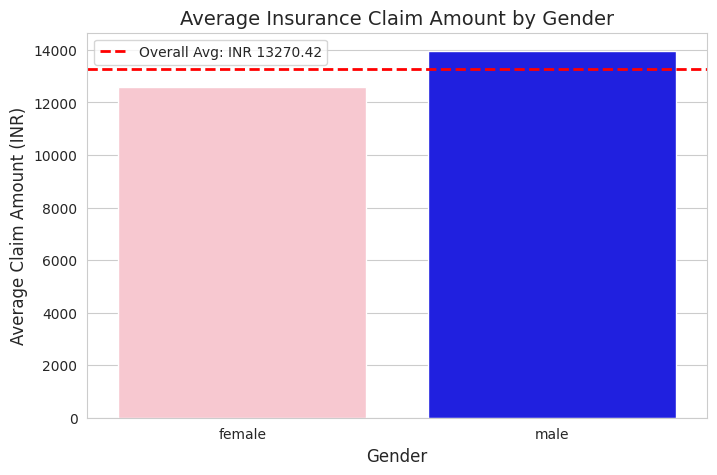

In [68]:
# Set Seaborn style
sns.set_style("whitegrid")

# Create a bar plot
plt.figure(figsize=(8, 5))
ax = sns.barplot(x=gender_avg_claim.index, y=gender_avg_claim.values, palette=["pink", "blue"])

# Add a horizontal line for the overall average
plt.axhline(y=overall_avg_claim, color='red', linestyle='dashed', linewidth=2, label=f"Overall Avg: INR {overall_avg_claim:.2f}")

# Labels and title
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Average Claim Amount (INR)", fontsize=12)
plt.title("Average Insurance Claim Amount by Gender", fontsize=14)

# Add a legend for the overall average line
plt.legend()

# Show the plot
plt.show()


# What is the average amount of money the company spent over each policy cover?

Analyzed the average claim amount per policy and compared it across genders.

Results:
Overall Average Claim Amount: INR 13,270.42

Female Average Claim Amount: INR 12,569.58 (Below overall average 📉)

Male Average Claim Amount: INR 13,956.75 (Above overall average 🚀)

Interpretation:
Males, on average, claim more than females.

The difference of INR 1,387.17 suggests that male policyholders might have higher medical expenses or different risk factors compared to females.

Factors such as age, BMI, smoking habits, and lifestyle choices could influence this trend.

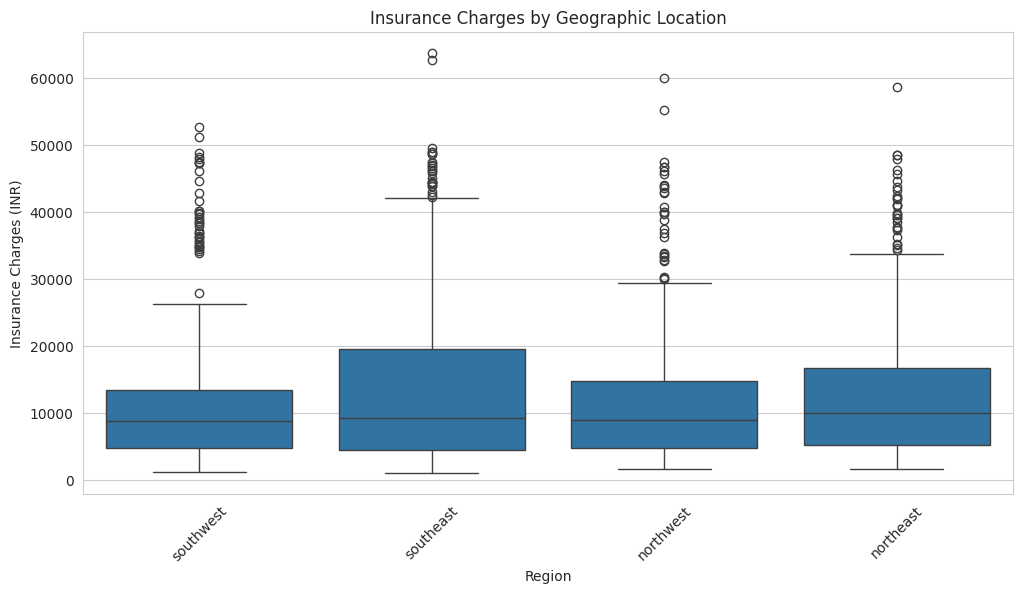

In [69]:
#3. Could you advice if the company needs to offer separate policies based upon the geographic location of the person?
if 'region' in df.columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='region', y='charges in INR', data=df)
    plt.xticks(rotation=45)
    plt.title("Insurance Charges by Geographic Location")
    plt.xlabel("Region")
    plt.ylabel("Insurance Charges (INR)")
    plt.show()
else:
    print("No geographic location column available in the dataset.")

# The company needs to offer separate policies based upon the geographic location of the person?
Observation: Insurance Charges by Region
The boxplot shows how insurance claim amounts vary by region.

Regions like southeast has highest median claims indicating higher health cost and regions like southwest have lowest median claims.

All the regions may have outliers, suggesting higher medical expenses for specific cases.

Recommendation:
If certain regions consistently show higher claims, the company should analyze healthcare costs in those areas.



In [70]:
df = pd.merge(df1, df2[['Policy no.', 'children']], on="Policy no.", how="left")

# Display first few rows
df.head()

,Policy no.,age,sex,bmi,charges in INR,children
0,PLC156898,19,female,27.900,16884.92400,0
1,PLC156907,18,male,33.770,1725.55230,1
2,PLC156916,28,male,33.000,4449.46200,3
3,PLC156925,33,male,22.705,21984.47061,0
4,PLC156934,32,male,28.880,3866.85520,0


<ipython-input-71-b52d1ae6b997>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="children", y="charges in INR", data=children_avg, palette="coolwarm")


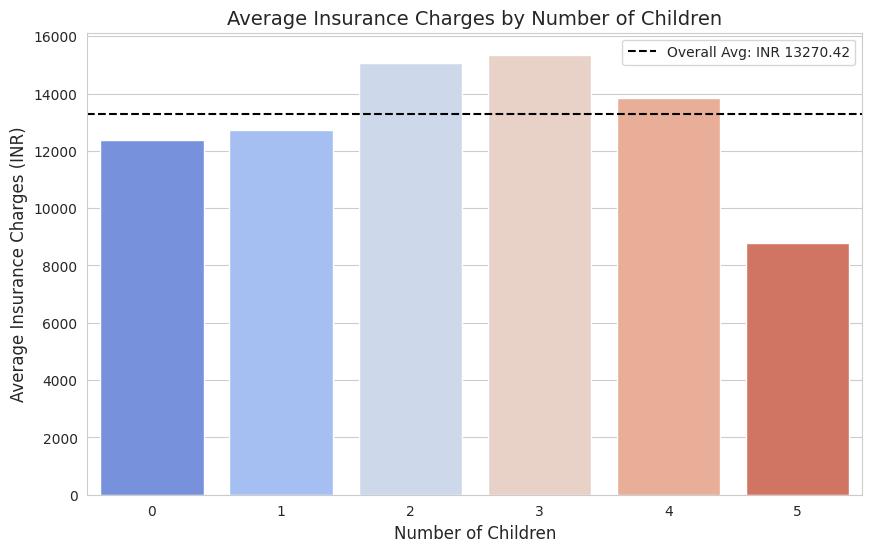

In [71]:
#4. Does the no. of dependents make a difference in the amount claimed?
# Set Seaborn stylea
# Set Seaborn style
sns.set_style("whitegrid")

# Calculate average charges per number of children
children_avg = df.groupby("children")["charges in INR"].mean().reset_index()

# Create bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x="children", y="charges in INR", data=children_avg, palette="coolwarm")

# Plot a reference line for the overall average
overall_avg = df["charges in INR"].mean()
plt.axhline(overall_avg, color="black", linestyle="--", label=f"Overall Avg: INR {overall_avg:.2f}")

# Labels and title
plt.xlabel("Number of Children", fontsize=12)
plt.ylabel("Average Insurance Charges (INR)", fontsize=12)
plt.title("Average Insurance Charges by Number of Children", fontsize=14)
plt.legend()

# Show plot
plt.show()


# Impact of Number of Children on Claim Amount
Policyholders with 3 children have the highest average claim amount.

This suggests that having 3 dependents leads to higher medical expenses or insurance claims.

Policyholders with 5 children have the lowest average claim amount.

This could mean that either families with more children are healthier, or they might not be utilizing the insurance benefits as much.

<ipython-input-47-69ead7aed88a>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=df["bmi"], y=df["charges in INR"], palette="coolwarm", alpha=0.6)


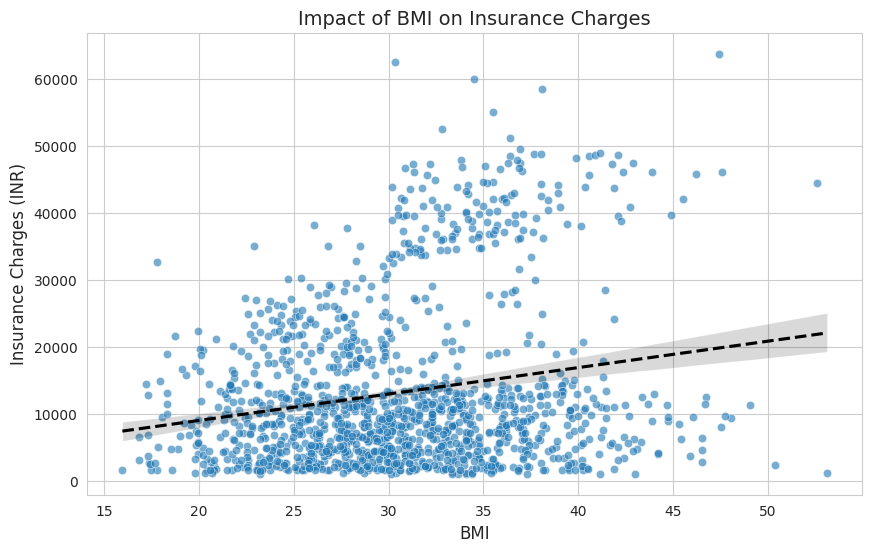

In [47]:
#5.Does a study of persons BMI get the company any idea for the insurance claim that it would extend?
# Scatter plot of BMI vs. Charges
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["bmi"], y=df["charges in INR"], palette="coolwarm", alpha=0.6)

# Trendline
sns.regplot(x=df["bmi"], y=df["charges in INR"], scatter=False, color="black", line_kws={"linestyle": "--"})

# Labels and title
plt.xlabel("BMI", fontsize=12)
plt.ylabel("Insurance Charges (INR)", fontsize=12)
plt.title("Impact of BMI on Insurance Charges", fontsize=14)
plt.show()


In [48]:
# Check correlation between BMI and insurance charges
correlation = df["bmi"].corr(df["charges in INR"])
print(f"Correlation between BMI and Insurance Charges: {correlation:.4f}")


Correlation between BMI and Insurance Charges: 0.1983


# Impact of BMI on Insurance Charges
The correlation coefficient is 0.1983, which indicates a weak positive correlation between BMI and insurance charges.

This suggests that higher BMI slightly increases claim amounts, but it is not a strong deciding factor.

Obese individuals tend to have higher claims, but the relationship is not significant enough to predict claims based on BMI alone.

In [53]:
df = df1.merge(df2, on="Policy no.", how="left")  # Adjust key if needed

<ipython-input-54-211ab513d3ea>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=smoker_avg.index, y=smoker_avg.values, palette=["blue", "red"])


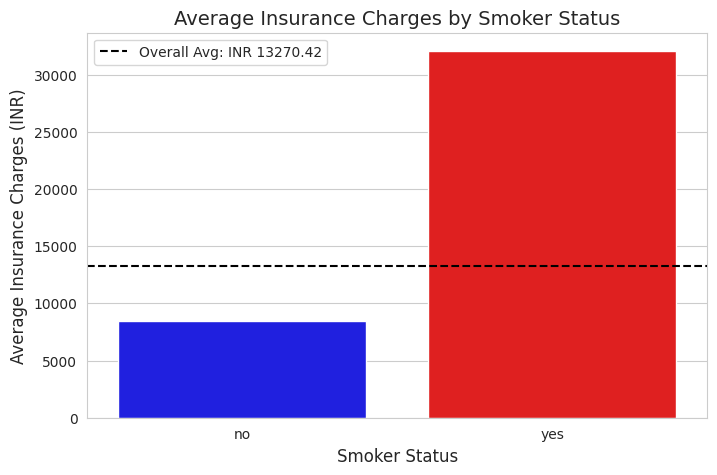

In [54]:
#6. Is it needed for the company to understand whether the person covered is a smoker or a non-smoker?
# Group by smoker status and calculate average claim amount
smoker_avg = df.groupby("smoker")["charges in INR"].mean()

# Separate charges for smokers and non-smokers
smoker_charges = df[df["smoker"] == "yes"]["charges in INR"]
non_smoker_charges = df[df["smoker"] == "no"]["charges in INR"]

# Plot bar chart for average insurance charges by smoker status
plt.figure(figsize=(8, 5))
sns.barplot(x=smoker_avg.index, y=smoker_avg.values, palette=["blue", "red"])

# Overall average line
overall_avg = df["charges in INR"].mean()
plt.axhline(overall_avg, color="black", linestyle="--", label=f"Overall Avg: INR {overall_avg:.2f}")

# Labels and title
plt.xlabel("Smoker Status", fontsize=12)
plt.ylabel("Average Insurance Charges (INR)", fontsize=12)
plt.title("Average Insurance Charges by Smoker Status", fontsize=14)
plt.legend()
plt.show()


# Impact of Smoking Status
Smokers ("yes") have significantly higher insurance charges than non-smokers ("no").

The "yes" bar crosses the overall average line, showing that smokers pay much more than the typical policyholder.

Non-smokers ("no") are well below the overall average, meaning they are paying less in comparison.

This confirms that smoking status is a major factor in insurance pricing.

The company should continue using smoking status as a key parameter while setting policy premiums.

<ipython-input-59-835f83c043c2>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_avg = df.groupby("Age Group")["charges in INR"].mean()
<ipython-input-59-835f83c043c2>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_avg.index, y=age_avg.values, palette="coolwarm")


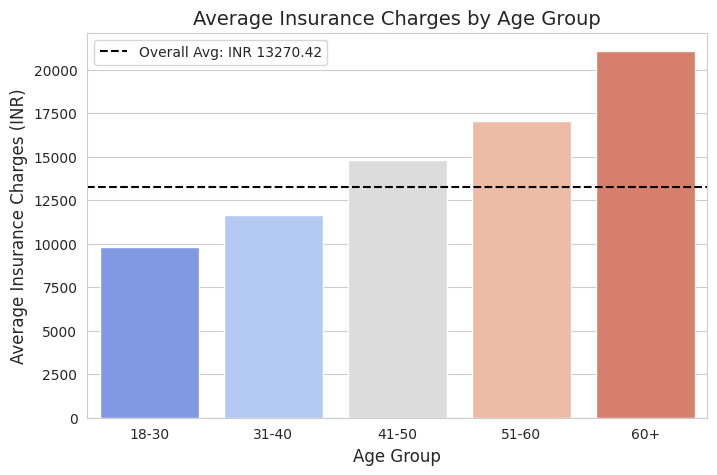

In [59]:
#7. Does age have any barrier on the insurance claimed?
# Create Age Groups
df["Age Group"] = pd.cut(df["age"], bins=[18, 30, 40, 50, 60, 100], labels=["18-30", "31-40", "41-50", "51-60", "60+"])

# Calculate Average Charges per Age Group
age_avg = df.groupby("Age Group")["charges in INR"].mean()

# Plot Bar Chart
plt.figure(figsize=(8, 5))
sns.barplot(x=age_avg.index, y=age_avg.values, palette="coolwarm")

# Overall average line
overall_avg = df["charges in INR"].mean()
plt.axhline(overall_avg, color="black", linestyle="--", label=f"Overall Avg: INR {overall_avg:.2f}")

plt.xlabel("Age Group", fontsize=12)
plt.ylabel("Average Insurance Charges (INR)", fontsize=12)
plt.title("Average Insurance Charges by Age Group", fontsize=14)
plt.legend()
plt.show()

# Impact of Age on insurance claimed
Insurance charges increase with age. The older the individual, the higher the average charges.

The 18-30 age group has the lowest average insurance charges.

The 60+ age group pays the highest insurance charges, significantly above the overall average.

The overall average (INR 13,270.42) is crossed by the 41-50, 51-60, and 60+ groups, indicating that older individuals contribute more to the total charges.

Insurance companies may charge higher premiums for older individuals due to increased health risks.

<ipython-input-60-d07e0de4ed6c>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bmi_avg.index, y=bmi_avg.values, palette="coolwarm")


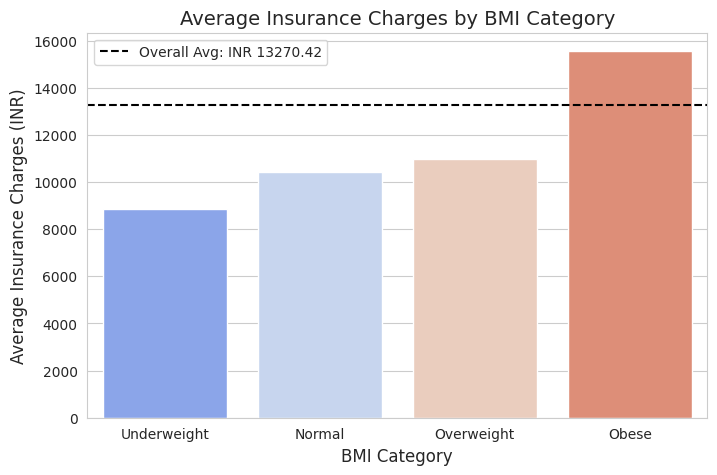

In [60]:
#Can the company extend certain discounts after checking the health status (BMI) in this case?
# Define BMI categories
def categorize_bmi(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 25:
        return "Normal"
    elif 25 <= bmi < 30:
        return "Overweight"
    else:
        return "Obese"

# Apply BMI categories
df["BMI Category"] = df["bmi"].apply(categorize_bmi)

# Calculate average charges by BMI category
bmi_avg = df.groupby("BMI Category")["charges in INR"].mean().sort_values()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=bmi_avg.index, y=bmi_avg.values, palette="coolwarm")

# Add overall average line
overall_avg = df["charges in INR"].mean()
plt.axhline(overall_avg, color="black", linestyle="--", label=f"Overall Avg: INR {overall_avg:.2f}")

# Labels and title
plt.xlabel("BMI Category", fontsize=12)
plt.ylabel("Average Insurance Charges (INR)", fontsize=12)
plt.title("Average Insurance Charges by BMI Category", fontsize=14)
plt.legend()
plt.show()

# Impact of BMI on Insurance Charges
Obese individuals have the highest insurance charges, significantly exceeding the overall average (INR 13,270.42).

Overweight individuals also have above-average charges, though not as high as the obese category.

Normal-weight individuals pay lower insurance charges compared to overweight and obese individuals.

Underweight individuals have the lowest average insurance charges, suggesting they may have fewer health risks in this dataset.

The trend indicates that as BMI increases, insurance charges also rise, likely due to higher health risks associated with obesity.

Conclusion:
The company can offer discounts to individuals with normal or underweight BMI, as they have lower claims.

Higher BMI groups (overweight and obese) may require higher premiums due to increased health risks.

Encouraging weight management programs could help reduce insurance costs in the long run.